In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('penjualan_mobil_toyota.csv')

In [4]:
df.head()

,Bulan,Penjualan
0,2011-01,27619
1,2011-02,25532
2,2011-03,32275
3,2011-04,21128
4,2011-05,19554


from matplotlib import pyplot as plt
_df_0['Penjualan'].plot(kind='hist', bins=20, title='Penjualan')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Bulan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Penjualan'].plot(kind='line', figsize=(8, 4), title='Penjualan')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Bulan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Penjualan', y='Bulan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

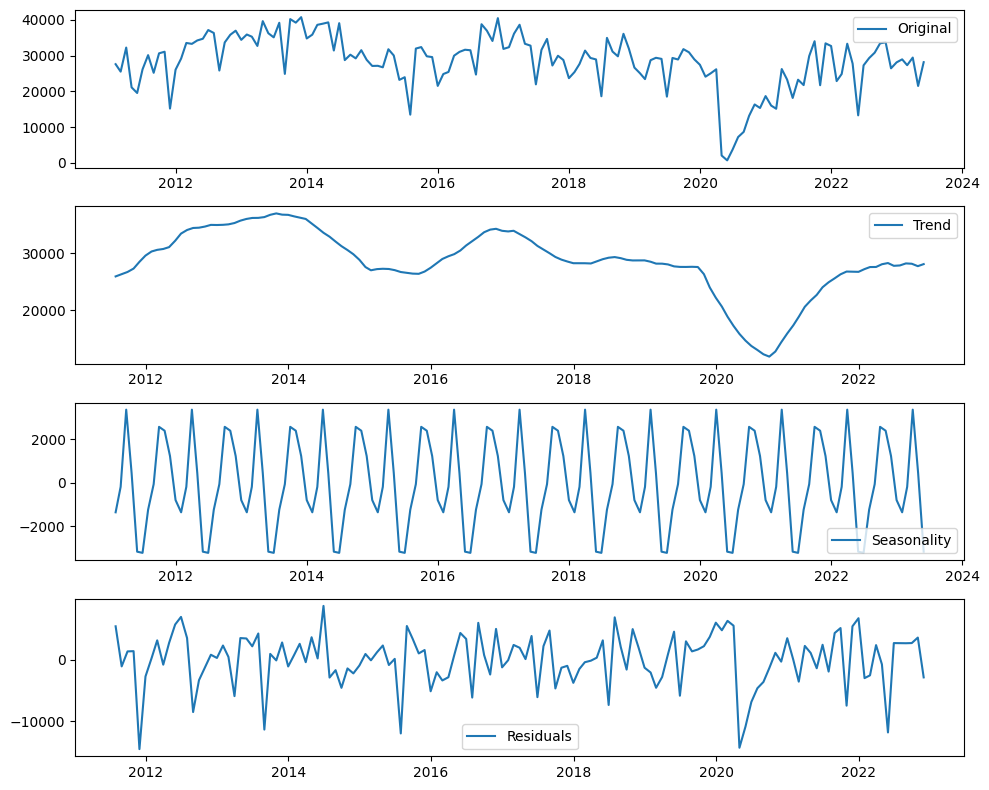

In [34]:
# Assuming 'df' is your DataFrame and 'Penjualan' is the column to decompose
decomposition = seasonal_decompose(df['Penjualan'], model='additive', period=12)

# Accessing the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the components using Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

axes[0].plot(df['Penjualan'], label='Original')
axes[0].legend(loc='best')
axes[1].plot(trend, label='Trend')
axes[1].legend(loc='best')
axes[2].plot(seasonal, label='Seasonality')
axes[2].legend(loc='best')
axes[3].plot(residual, label='Residuals')
axes[3].legend(loc='best')

plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bulan      149 non-null    object
 1   Penjualan  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [6]:
df.index = pd.to_datetime(df.Bulan, format='%Y-%m')

In [7]:
df = df.resample("M").sum()

<ipython-input-7-a2cb459a980b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").sum()


In [8]:
df.head()

,Bulan,Penjualan
Bulan,,
2011-01-31,2011-01,27619
2011-02-28,2011-02,25532
2011-03-31,2011-03,32275
2011-04-30,2011-04,21128
2011-05-31,2011-05,19554


In [12]:
latih = df[:-6]
uji = df[-6:]

In [13]:
latih.head()

,Bulan,Penjualan
Bulan,,
2011-01-31,2011-01,27619
2011-02-28,2011-02,25532
2011-03-31,2011-03,32275
2011-04-30,2011-04,21128
2011-05-31,2011-05,19554


In [14]:
uji.head()

,Bulan,Penjualan
Bulan,,
2022-12-31,2022-12,28128
2023-01-31,2023-01,28970
2023-02-28,2023-02,27336
2023-03-31,2023-03,29471
2023-04-30,2023-04,21518


In [15]:
def lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])

    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [16]:
X, y, batch_terakhir = lag(latih.Penjualan.values, 12)

In [17]:
X

array([[27619, 25532, 32275, ..., 31109, 15195, 26076],
       [25532, 32275, 21128, ..., 15195, 26076, 29189],
       [32275, 21128, 19554, ..., 26076, 29189, 33558],
       ...,
       [34046, 21730, 33450, ..., 27290, 29326, 30844],
       [21730, 33450, 32707, ..., 29326, 30844, 33449],
       [33450, 32707, 22886, ..., 30844, 33449, 33740]])

In [18]:
y

array([29189, 33558, 33306, 34264, 34737, 37176, 36353, 25848, 33705,
       35855, 36996, 34427, 35923, 35318, 32726, 39668, 36282, 35125,
       39210, 24899, 40235, 39246, 40781, 34819, 35886, 38631, 38959,
       39323, 31440, 39107, 28757, 30273, 29247, 31538, 28835, 27123,
       27166, 26743, 31801, 30053, 23223, 23967, 13495, 31991, 32405,
       29826, 29607, 21541, 24859, 25447, 29995, 31059, 31662, 31519,
       24718, 38803, 36994, 34116, 40510, 31888, 32377, 36147, 38656,
       33328, 32806, 21974, 31621, 34690, 27251, 29979, 28797, 23706,
       25405, 27665, 31424, 29360, 28950, 18642, 34984, 31149, 29821,
       36119, 31981, 26661, 25081, 23443, 28732, 29408, 29103, 18541,
       29362, 28929, 31831, 30944, 28970, 27453, 24119, 25053, 26191,
        2053,   695,  3705,  7224,  8673, 13150, 16345, 15361, 18687,
       16033, 15144, 26258, 23301, 18167, 23271, 21763, 29898, 34046,
       21730, 33450, 32707, 22886, 24865, 33344, 27779, 13297, 27290,
       29326, 30844,

In [19]:
batch_terakhir

array([[32707, 22886, 24865, 33344, 27779, 13297, 27290, 29326, 30844,
        33449, 33740, 26462]])

In [20]:
def mlp(input_, y_, epochs):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1))

#   opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer='adam', loss='mape')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [22]:
!pip install tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model = mlp(X, y, 300)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 87.1027
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.8115 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.6648 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.5289 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.7978 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.3983 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.1117 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.0453 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.2798 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.9995 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.7832  
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49.4329 
Epoch 13/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84.8383 
Epoch 14/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.0283  
Epoch 15/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.5419  
E

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 935 (3.66 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624 (2.44 KB)

In [25]:
def fungsi_prediksi(model, batch_terakhir, n):
    in_value = batch_terakhir.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(batch_terakhir.shape)
    return np.array(preds).ravel()

In [26]:
prediksi = fungsi_prediksi(model, batch_terakhir, 6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [27]:
prediksi

array([24863.23 , 25109.746, 22907.668, 18974.082, 13397.363, 13061.846],
      dtype=float32)

In [28]:
uji['Prediksi_Penjualan'] = prediksi

<ipython-input-28-1befbd3859c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uji['Prediksi_Penjualan'] = prediksi


In [36]:
uji

from matplotlib import pyplot as plt
uji['Prediksi_Penjualan'].plot(kind='line', figsize=(8, 4), title='Prediksi_Penjualan')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(uji['Bulan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(uji, x='Penjualan', y='Bulan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(uji['Bulan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(uji, x='Prediksi_Penjualan', y='Bulan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,Bulan,Penjualan,Prediksi_Penjualan
Bulan,,,
2022-12-31,2022-12,28128,24863.230469
2023-01-31,2023-01,28970,25109.746094
2023-02-28,2023-02,27336,22907.667969
2023-03-31,2023-03,29471,18974.082031
2023-04-30,2023-04,21518,13397.363281
2023-05-31,2023-05,28178,13061.845703


In [37]:
def hitung_error(df,kolom_1,kolom_2):
    data = df.copy()
    list_ka = []
    list_pka = []
    for i in range(len(data)):
        ka = abs(data[kolom_1][i]-data[kolom_2][i])
        list_ka.append(ka)
        pka = abs((data[kolom_1][i]-data[kolom_2][i])/data[kolom_1][i])*100
        list_pka.append(pka)
    data['Kesalahan_Absolut'] = list_ka
    data['Persentase_Kesalahan_Absolut'] = list_pka
    return data

In [38]:
kolom_1 = 'Penjualan'
kolom_2 = 'Prediksi_Penjualan'
df_new = hitung_error(uji,kolom_1,kolom_2)

<ipython-input-37-ecbadcbfbd5a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ka = abs(data[kolom_1][i]-data[kolom_2][i])
<ipython-input-37-ecbadcbfbd5a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pka = abs((data[kolom_1][i]-data[kolom_2][i])/data[kolom_1][i])*100


In [39]:
df_new

,Bulan,Penjualan,Prediksi_Penjualan,Kesalahan_Absolut,Persentase_Kesalahan_Absolut
Bulan,,,,,
2022-12-31,2022-12,28128,24863.230469,3264.769531,11.606831
2023-01-31,2023-01,28970,25109.746094,3860.253906,13.325005
2023-02-28,2023-02,27336,22907.667969,4428.332031,16.199634
2023-03-31,2023-03,29471,18974.082031,10496.917969,35.617787
2023-04-30,2023-04,21518,13397.363281,8120.636719,37.738808
2023-05-31,2023-05,28178,13061.845703,15116.154297,53.645235


In [41]:
mae = sum(df_new['Kesalahan_Absolut'])/len(df_new)
mape = sum(df_new['Persentase_Kesalahan_Absolut'])/len(df_new)
print('Nilai MAE : ', mae)
print('Nilai MAPE: ', mape, '%')

Nilai MAE :  7547.844075520833
Nilai MAPE:  28.022216731625246 %
